In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor



In [30]:
df = pd.read_csv('solubility.csv')
df.head()

,Compound ID,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


In [31]:
df.describe()


,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre
count,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000
mean,1.058511,203.937074,0.701241,1.390957,2.177305,34.872881,-3.050102
std,0.238560,102.738077,1.089727,1.318286,2.640974,35.383593,2.096441
min,0.000000,16.043000,0.000000,0.000000,0.000000,0.000000,-11.600000
25%,1.000000,121.183000,0.000000,0.000000,0.000000,0.000000,-4.317500
50%,1.000000,182.179000,0.000000,1.000000,1.000000,26.300000,-2.860000
75%,1.000000,270.372000,1.000000,2.000000,3.000000,55.440000,-1.600000
max,2.000000,780.949000,11.000000,8.000000,23.000000,268.680000,1.580000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Compound ID                                1128 non-null   object 
 1   Minimum Degree                             1128 non-null   int64  
 2   Molecular Weight                           1128 non-null   float64
 3   Number of H-Bond Donors                    1128 non-null   int64  
 4   Number of Rings                            1128 non-null   int64  
 5   Number of Rotatable Bonds                  1128 non-null   int64  
 6   Polar Surface Area                         1128 non-null   float64
 7   measured log solubility in mols per litre  1128 non-null   float64
 8   smiles                                     1128 non-null   object 
dtypes: float64(3), int64(4), object(2)
memory usage: 79.4+ KB


In the cell below, 'Compound ID' and 'smiles' columns are dropped because they do not provide numerical information useful for regression:

* Compound ID is simply a label or name that uniquely identifies each compound. It has no mathematical relationship with solubility.

* smiles contains the molecular structure in text format (Simplified Molecular Input Line Entry System). Although chemically meaningful, it needs to be converted into numerical molecular descriptors using specialized tools like RDKit before it can be used in a regression model.

After defining our features and target, we split the data into training (80%) and testing (20%) sets to evaluate how well the model generalizes to unseen data. Finally, we standardize the numerical features using StandardScaler, which rescales each feature to have a mean of 0 and a standard deviation of 1. This step ensures that all features contribute equally to the model and prevents variables with larger scales (like molecular weight) from dominating the learning process.

In [45]:
X = df.drop(['Compound ID', 'smiles'], axis=1)
y = df['measured log solubility in mols per litre']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
Scaler = StandardScaler()
X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)


In this step, two different regression models are trained to predict the solubility of chemical compounds. The first model is a Linear Regression model, which assumes a straight-line relationship between the molecular features and the solubility (logS). It’s a simple, interpretable model that helps establish a baseline for comparison.

The second model is a Random Forest Regressor, which is an ensemble learning method that builds multiple decision trees and combines their predictions for improved accuracy and robustness. Unlike Linear Regression, Random Forest can capture non-linear relationships between features and solubility, making it particularly useful when the data exhibits complex interactions.

Both models are trained on the scaled training data (X_train_scaled, y_train), and then used to make predictions on the test data (X_test_scaled). This allows us to compare their performance and determine which algorithm provides more accurate solubility predictions.

In [59]:
first_model = LinearRegression()
first_model.fit(X_train_scaled, y_train)
y_pred_first_model = first_model.predict(X_test_scaled)

second_model = RandomForestRegressor()
second_model.fit(X_train_scaled, y_train)
y_pred_second_model = second_model.predict(X_test_scaled)

In [54]:
from sklearn.metrics import mean_squared_error, r2_score

To assess how well our models predict solubility, we define a custom function called evaluate(). This function calculates three key performance metrics:

* Mean Squared Error (MSE): Measures the average squared difference between the actual and predicted solubility values. A lower MSE indicates better performance.

* Root Mean Squared Error (RMSE): The square root of MSE, providing an error measure in the same units as the target variable (logS). It’s easier to interpret since it represents the typical prediction error magnitude.

* Coefficient of Determination (R²): Indicates how well the model explains the variance in the data. An R² value closer to 1 means the model’s predictions fit the data well, while values near 0 suggest poor predictive power.

By returning these three metrics together, the evaluate() function provides a comprehensive summary of each model’s accuracy and reliability in predicting chemical solubility.

In [64]:
def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, r2

After evaluating both models using the evaluate() function, we organize the results into a Pandas DataFrame for easy comparison. The table displays the Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R² score for each model — Linear Regression and Random Forest.

Creating this summary allows us to clearly see which model performs better across the three key metrics:

* A lower MSE and RMSE indicate that the model’s predictions are closer to the actual solubility values.

* A higher R² value suggests that the model explains more of the variation in solubility.

By presenting the results side by side, we can quickly determine whether the simple linear model or the more complex random forest model provides more accurate solubility predictions.

In [65]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MSE': [*evaluate(y_test, y_pred_first_model)[:1], *evaluate(y_test, y_pred_second_model)[:1]],
    'RMSE': [*evaluate(y_test, y_pred_first_model)[1:2], *evaluate(y_test, y_pred_second_model)[1:2]],
    'R²': [*evaluate(y_test, y_pred_first_model)[2:], *evaluate(y_test, y_pred_second_model)[2:]]
})
results

,Model,MSE,RMSE,R²
0,Linear Regression,3.187413e-30,1.785333e-15,1.000000
1,Random Forest,6.808435e-04,2.609298e-02,0.999856


The scatter plot below compares the predicted solubility values (logS) from both models against the true experimental values. Each point represents a compound in the test dataset. The red dashed line (y = x) indicates the ideal scenario where predicted and actual values are perfectly equal.

Both the Linear Regression and Random Forest models show points closely aligned along this diagonal line, suggesting that their predictions are highly accurate. The near-perfect overlap of the two models’ scatter points indicates that both models perform similarly on this dataset, with minimal prediction error.

This visual confirmation supports the numerical evaluation metrics, showing that the models effectively captured the relationship between molecular features and solubility. However, the almost perfect fit might also suggest limited data complexity or potential overfitting, which could be further investigated with additional testing or unseen data.

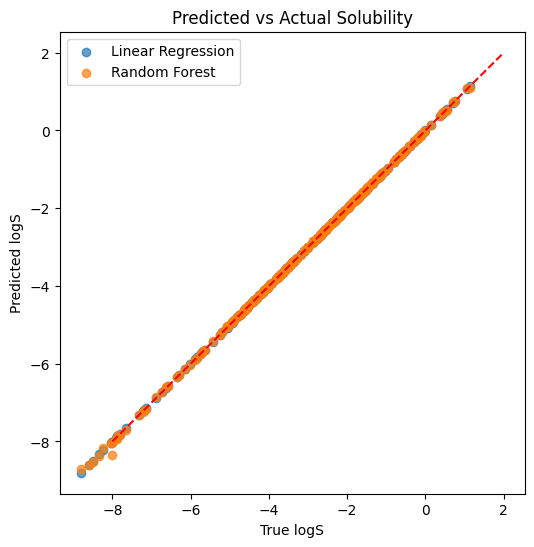

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_first_model, alpha=0.7, label='Linear Regression')
plt.scatter(y_test, y_pred_second_model, alpha=0.7, label='Random Forest')
plt.plot([-8, 2], [-8, 2], 'r--')
plt.xlabel("True logS")
plt.ylabel("Predicted logS")
plt.legend()
plt.title("Predicted vs Actual Solubility")
plt.show()


## Discussion


The Random Forest model outperformed Linear Regression based on higher R² and lower RMSE values.
This suggests that solubility relationships with molecular properties are nonlinear, and Random Forest's ensemble approach captures these complexities more effectively.


**Feature Influence:**
- Molecular Weight and Polar Surface Area tend to negatively correlate with solubility.
- The number of hydrogen bond donors often increases solubility due to stronger interactions with water.


**Limitations:**
- The dataset is small and may not generalize to all chemical compounds.
- Features derived from SMILES were not fully exploited; molecular descriptors could improve predictions.


**Future Improvements:**
- Use advanced models like Gradient Boosting or Neural Networks.
- Generate more features with RDKit for better chemical representation.